In [66]:
# Initialize Otter
import otter
grader = otter.Notebook("ehrenfest_fleas.ipynb")

# Ehrenfests' Fleas
*Adopted from Professor Austin Hedeman's 112 Computational Assignments*

| Question  | Points |
|---|---|
| 1a  | 2 |
| 1b | 1 |
| 1c | 1  |
| 1d  | 2  |
| 1e | 2 |
| 2a | 1 |
| 2b | 1 |
| 7 | 10 |

## Question 1: Ehrenfests' Fleas

### Learning objectives
In this question you will:

- study a Markov chain and analyse its properties
- verify the analysed behaviour by comparing to Monte Carlo simulations
- observe the emergence of a second law of thermodynamics


Ehrenfest has two dogs upon which $N$ fleas are distributed: $N_1$ on dog 1, and $N_2 = N - N_1$ on dog 2. We consider the microstate of the system to be $x = \{ x_1, x_2, ... x_N \}$, where $x_i = 1 ,  2$ indicates whether the $i$-th flea is on the first or second dog. In this sense, the number of fleas on each dog $N_1 + N_2 = N$ is a macrostate. This is a system whose statistics you have now studied to death in another guise: you should know the resulting multiplicity $g(N_1, N)$ and why it limits to a Gaussian when $N$ is large.

However, in this problem we are going to study dynamics. You can think of it as a very crude version of the Newton's laws or Schroedinger equation which  govern  the microstates of real physical systems.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom

### 1a. 

Consider the following random process. At each point in time,  randomly pick one of the $N$ fleas, and have it hop to the opposite dog. If $x(t)$ is the configuration of fleas at time $t$, this defines a probabilistic process for updating the flea configuration, $x(t) \to x(t+1)$. Write a function which takes as input length-$N$ array $x$, and which returns an updated configuration of fleas. 

In [9]:
def hop_flea(x):
    
    x = np.array(x, dtype=int)
    i = np.random.randint(len(x))
    x[i] = 3 - x[i]
    
    return x

x = [1, 2, 1, 1, 2]
print("Before:", x)
x = hop_flea(x)
print("After: ", x)

Before: [1, 2, 1, 1, 2]
After:  [1 2 1 2 2]


In [10]:
grader.check("q1a")

q1a results: All test cases passed!

### 1b. 

Define the function `N_1` which gives you the number of fleas on dog 1 at anytime $t$. I.e, $N_1(t)$.

In [52]:
def N1(x):  
    num = np.sum(np.array(x) == 1)
    
    return num

In [53]:
grader.check("q1b")

q1b results: All test cases passed!

<!-- BEGIN QUESTION -->

# 1c.

Let,

$$ S = \ln g(N_1, N) $$

be the dimensionless version of entropy. Finish the function below. `Hint: Use binom`.

In [54]:
def S(N,N1):
    g = binom(N, N1)
    return np.log(g)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# 1d.

Using a `for` plot $N_1(t)$ and $S$ for each time step that goes to `T=20*N` with the values of `N` defined below.

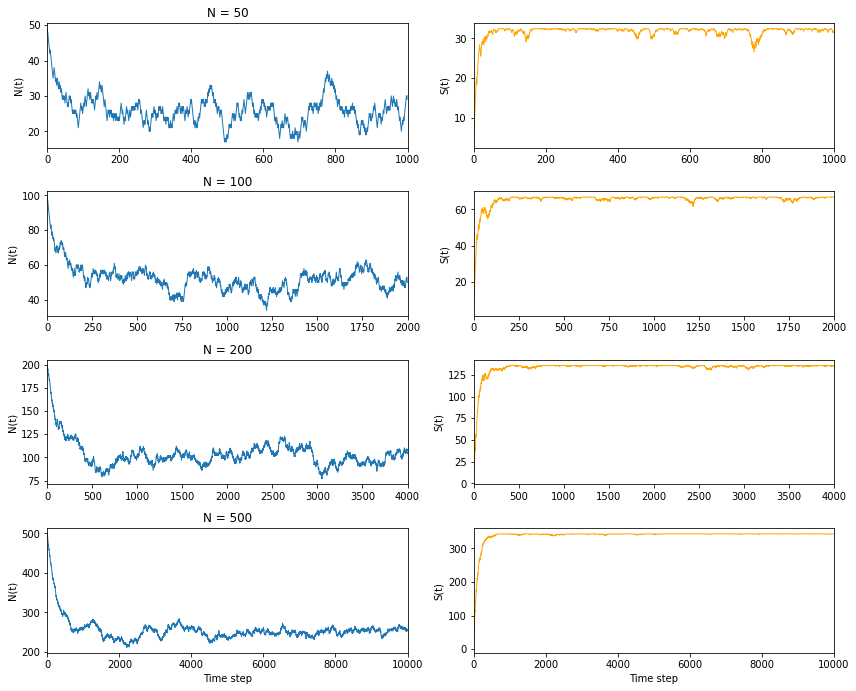

In [64]:
np.random.seed(112)

N = [50, 100, 200, 500]

fig, axes = plt.subplots(4, 2, figsize=(12,10))

for idx, N in enumerate(N):
    T = 20 * N
    x = np.ones(N, dtype=int)  # Start with all fleas on Dog 1

    N1_vals = []
    S_vals = []

    for t in range(T):
        x = hop_flea(x)
        N_1 = N1(x)
        N1_vals.append(N_1)
        S_vals.append(S(N, N_1))

    # Plot N1(t)
    axes[idx, 0].plot(N1_vals, lw=1)
    axes[idx, 0].set_ylabel("N(t)")
    axes[idx, 0].set_title(f"N = {N}")
    axes[idx, 0].set_xlim(0, T)

    # Plot S(t)
    axes[idx, 1].plot(S_vals, lw=1, color='orange')
    axes[idx, 1].set_ylabel("S(t)")
    axes[idx, 1].set_xlim(0, T)

    if idx == 3:
        axes[idx, 0].set_xlabel("Time step")
        axes[idx, 1].set_xlabel("Time step")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<!-- END QUESTION -->

# 1e. 

Now, starting from the same $x(0)$ for $N=50$, evolve for $T=10000$ steps, logging $N_1(t)$ as before. 
Plot a histogram of $N_1(t)$ for the last $T/2$ time steps. Using what you know about random walks / binary systems, compare it against the expected probability distrubiton $P(N_1, N)$ (either the exact one, or within the Gaussian approximation.)   Why did I have you produce the histogram using only steps $T/2 < t  \leq T$, rather than including the first $T/2$ steps?

<!-- BEGIN QUESTION -->



Text(0, 0.5, '$N_1$')

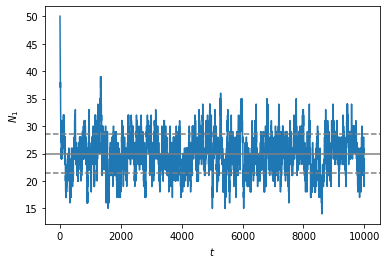

In [57]:
N=50
T=10000

N1s = np.zeros(T, dtype=int)
x = np.ones(N, dtype=int)

N1s[0] = N1(x)
for t in range(1, T):
    x = hop_flea(x)
    N1s[t] = N1(x)

plt.plot(N1s)
m,s = N/2, np.sqrt(N)/2
plt.axhline(m, c="gray")
plt.axhline(m+s,c="gray",ls="--")
plt.axhline(m-s,c="gray",ls="--")
plt.xlabel("$t$")
plt.ylabel("$N_1$")


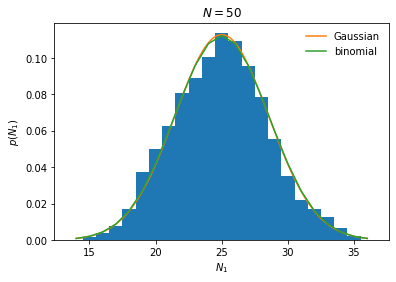

In [58]:
def gaussian(x,m,s):
    gaussian_wf = 1/(np.sqrt(2 * np.pi) * s) * np.exp(-0.5 * ((x - m) / s) **2)
    return gaussian_wf

samples = N1s[T//2:]
mn,mx = np.amin(samples),np.amax(samples)
bin_edges = np.arange(mn-1/2,mx+1)
plt.hist(samples, density=True, bins=bin_edges)

mesh = np.linspace(mn,mx,1000)
plt.plot(mesh, gaussian(mesh, m, s),label="Gaussian")
n = np.arange(mn,mx+1)
plt.plot(n, binom(N,n)/2**N, label="binomial")
plt.xlabel("$N_1$")
plt.ylabel("$p(N_1)$")
plt.title("$N=%d$"%N)
plt.legend(frameon=False)

<!-- END QUESTION -->

---

## Question 2: Large $N$ effect

### Learning objectives
In this question you will:

- observe how $e^{-Nf(x)}$ becomes sharply peaked for large $N$ around the global minima of $f(x)$


### 2a. 

Consider the function $$f(x)={x\over 10}-{x^2\over 2}+{x^4\over 4}.$$ Plot the normalized (such that the maximum is 1) $e^{-Nf(x)}$ for $N=1,10,100,1000$. The purpose of this problem is to show you that the "large $N$" effect is not restricted to functions with a single minimum.

*Note that $g(x)$ here is the minimum of the function f(x).* `Hint: use np.amin`.

Text(0, 0.5, 'normalised $e^{-Nf(x)}$')

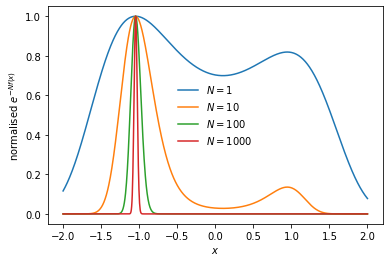

In [59]:
x = np.linspace(-2,2,1000)

def f(x):
    f = x/10 - (x**2)/2 + (x**4)/4
    return f

#f_val = f(x)
    
def g(x, f):
    fx=f(x)
    shift = fx-np.amin(fx)
    return shift

g_val = g(x, f)

Ns = [1,10,100,1000]

for N in Ns:
    fx=f(x)
    y = np.exp(-N*g_val)
    plt.plot(x,y,label="$N=%d$"%N)
    
plt.legend(frameon=False)
plt.xlabel("$x$")
plt.ylabel("normalised $e^{-Nf(x)}$")

In [60]:
grader.check("q2a")

q2a results: All test cases passed!

### 2b. 

Consider the function $$f(x,y)={1\over 2}(x^2+y^2)+{1\over 4}(x^2+y^2)^2.$$ Plot $e^{-N f(x,y)}$ for $N=1,10,100,1000$. The purpose of this problem is to show you that the "large N" effect is not restricted to a single variable. 

Hint: see the numpy array tutorial ([GitHub](https://github.com/berkeley-physics/Python-Tutorials/blob/master/2%20-%20Intermediate/3%20-%20NumPy%20arrays.ipynb), [DataHub](https://datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fberkeley-physics%2FPython-Tutorials&urlpath=tree%2FPython-Tutorials%2F2+-+Intermediate%2F3+-+NumPy+arrays.ipynb&branch=master)) to learn how to make a 3d or 2d colour plot. Also, Mathematica is very convenient for 3d plotting.

Hint: Use `np.meshgrid` to define your 2D space.

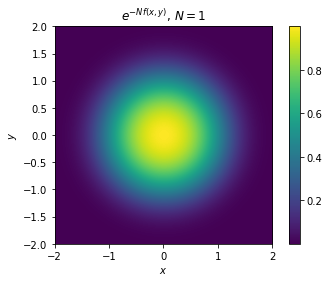

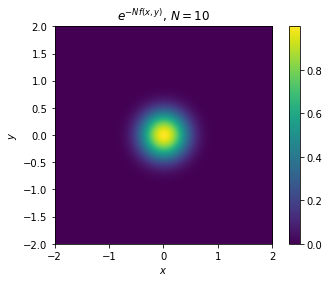

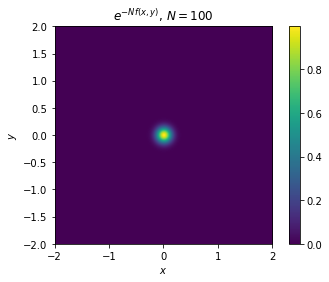

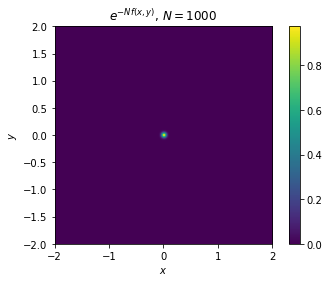

In [61]:
def f_0(x, y):
    return 1/2*(x**2 + y**2) + 1/4*(x**2 + y**2)**2

x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)
x,y = np.meshgrid(x,y)

for N in Ns:
    plt.figure()
    plt.imshow(np.exp(-N*f_0(x,y)),extent=(-2,2,-2,2))
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title("$e^{-Nf(x,y)}$, $N=%d$"%N)
    plt.colorbar()

In [62]:
grader.check("q2b")

q2b results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [67]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

/Users/anissapokorny-yadav/opt/anaconda3/lib/python3.9/site-packages/otter/check/notebook.py:493: UserWarning: Could not locate a PDF to include
  warnings.warn("Could not locate a PDF to include")


OSError: xelatex not found on PATH, if you have not installed xelatex you may need to do so. Find further instructions at https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex.